<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/Heart_parameters_class_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [4]:
df= pd.read_csv("/gdrive/My Drive/df1_heart.csv")

In [5]:
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Age,SepsisLabel
0,0,99.0,100.0,37.0,120.0,71.0,60.0,69.66,0
1,1,97.5,100.0,37.0,120.0,78.0,60.0,69.66,0
2,2,96.0,100.0,37.0,120.0,70.0,60.0,69.66,0
3,3,100.0,99.0,37.0,120.0,75.0,60.0,69.66,0
4,4,102.0,100.0,36.0,120.0,74.0,60.0,69.66,0


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
pd.crosstab(df.SepsisLabel, columns='count')

col_0,count
SepsisLabel,
0,973683
1,20124


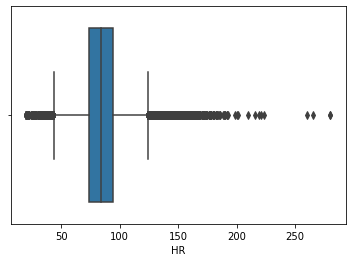

In [8]:
sns.boxplot(df['HR'])

In [9]:
print(df['HR'].quantile(0.10))
print(df['HR'].quantile(0.90))

64.0
106.0


In [10]:
df["HR"] = np.where(df["HR"] <64.0, 64.0,df['HR'])
df["HR"] = np.where(df["HR"] >106.0, 106.0,df['HR'])
print(df['HR'].skew())

0.11335757383538864


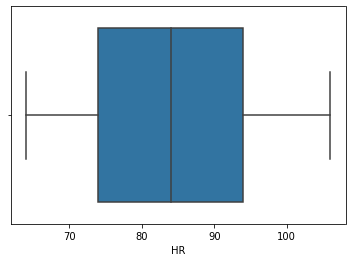

In [11]:
sns.boxplot(df['HR'])

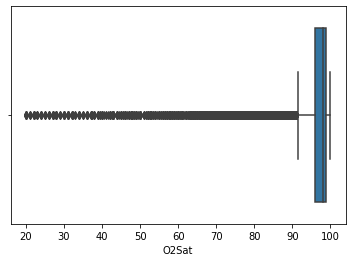

In [12]:
sns.boxplot(df['O2Sat'])

In [13]:
print(df['O2Sat'].quantile(0.10))
print(df['O2Sat'].quantile(0.90))

94.0
100.0


In [14]:
df["O2Sat"] = np.where(df["O2Sat"] <94.0, 94.0,df['O2Sat'])
df["O2Sat"] = np.where(df["O2Sat"] >100.0, 100.0,df['O2Sat'])
print(df['O2Sat'].skew())

-0.4277130710644394


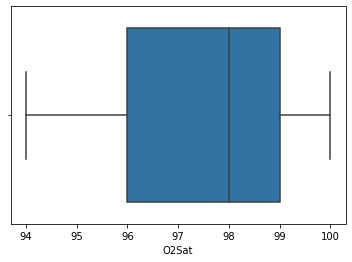

In [15]:
sns.boxplot(df['O2Sat'])

In [16]:
print(df['SBP'].quantile(0.10))
print(df['SBP'].quantile(0.90))

97.0
150.0


In [17]:
df["SBP"] = np.where(df["SBP"] <97.0, 97.0,df['SBP'])
df["SBP"] = np.where(df["SBP"] >150.0, 150.0,df['SBP'])
print(df['SBP'].skew())

0.2804638587639356


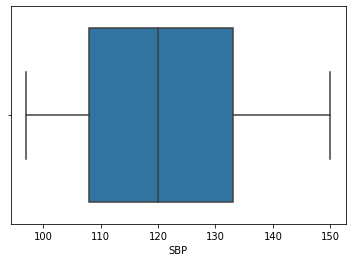

In [18]:
sns.boxplot(df['SBP'])

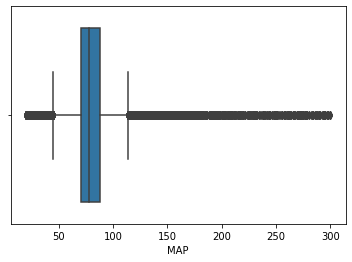

In [19]:
sns.boxplot(df['MAP'])

In [20]:
print(df['MAP'].quantile(0.10))
print(df['MAP'].quantile(0.90))

63.0
99.0


In [21]:
df["MAP"] = np.where(df["MAP"] <63.0, 63.0,df['MAP'])
df["MAP"] = np.where(df["MAP"] >99.0, 99.0,df['MAP'])
print(df['MAP'].skew())

0.2901440610172552


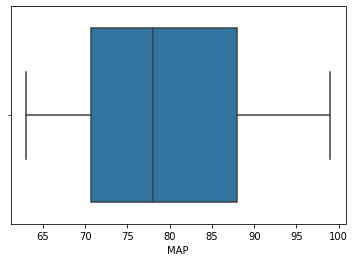

In [22]:
sns.boxplot(df['MAP'])

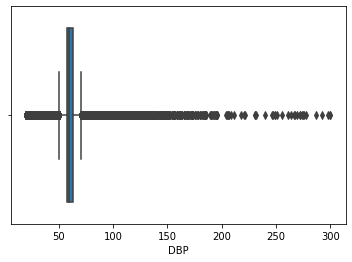

In [23]:
sns.boxplot(df['DBP'])

In [24]:
print(df['DBP'].quantile(0.10))
print(df['DBP'].quantile(0.90))

50.0
74.0


In [25]:
df["DBP"] = np.where(df["DBP"] <50.0, 50.0,df['DBP'])
df["DBP"] = np.where(df["DBP"] >74.0, 74.0,df['DBP'])
print(df['DBP'].skew())

0.44949881448858164


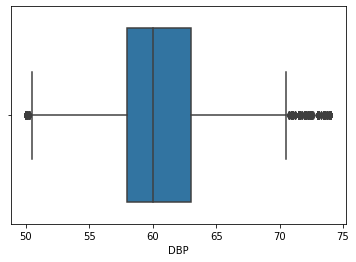

In [26]:
sns.boxplot(df['DBP'])

In [27]:
from pandas import read_csv, DataFrame, crosstab, pivot_table, set_option

In [28]:
# Descriptives
df = df.sample(n=20000, replace=False,random_state=1)
df = DataFrame(df)
print("Descriptive distributions:")
print("")
print(df.describe())
print("")

Descriptive distributions:

                 HR         O2Sat  ...           Age   SepsisLabel
count  20000.000000  20000.000000  ...  20000.000000  20000.000000
mean      84.308575     97.527575  ...     62.462932      0.021100
std       13.193566      1.959284  ...     16.392707      0.143721
min       64.000000     94.000000  ...     14.000000      0.000000
25%       74.000000     96.000000  ...     52.000000      0.000000
50%       84.000000     98.000000  ...     64.450000      0.000000
75%       94.000000     99.000000  ...     75.250000      0.000000
max      106.000000    100.000000  ...    100.000000      1.000000

[8 rows x 8 columns]



In [29]:
X = df.drop('SepsisLabel', axis=1)
y = df.SepsisLabel

In [30]:
#Train-Test split using stratified random sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=4)

In [31]:
#Checking the class (percentage) distribution of the target in the training set
pd.crosstab(y_train, columns='count')/len(y_train)*100

col_0,count
SepsisLabel,
0,97.892857
1,2.107143


In [32]:
#Checking the class (percentage) distribution of the target in the training set
pd.crosstab(y_test, columns='count')/len(y_test)*100

col_0,count
SepsisLabel,
0,97.883333
1,2.116667


Random undersampling

In [33]:
from imblearn import under_sampling, over_sampling

In [34]:
#Performing random undersampling on the training dataset
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1.0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
#Checking the class distribution of the target
pd.crosstab(y_rus, columns='count')/len(y_rus)*100

col_0,count
row_0,
0,50.0
1,50.0


In [36]:
#Performing random undersampling on the training dataset
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=1.0)
X_rus_test, y_rus_test = rus.fit_resample(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
#Checking the class distribution of the target
pd.crosstab(y_rus_test, columns='count')/len(y_rus_test)*100

col_0,count
row_0,
0,50.0
1,50.0


In [38]:
from sklearn.naive_bayes import GaussianNB # I am using Gaussian algorithm from Naive Bayes

# Lets creat the model
sepsis_model = GaussianNB()

sepsis_model.fit(X_rus, y_rus.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
sepsis_train_predict = sepsis_model.predict(X_rus)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_rus, sepsis_train_predict)))
print()

Model Accuracy: 0.6237



In [40]:
sepsis_test_predict = sepsis_model.predict(X_rus_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_rus_test, sepsis_test_predict)))
print()

Model Accuracy: 0.5709



In [41]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_rus_test, sepsis_test_predict, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_rus_test, sepsis_test_predict, labels=[1, 0]))

Confusion Matrix
[[ 41  86]
 [ 23 104]]

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.32      0.43       127
           0       0.55      0.82      0.66       127

    accuracy                           0.57       254
   macro avg       0.59      0.57      0.54       254
weighted avg       0.59      0.57      0.54       254



In [42]:
from sklearn.ensemble import RandomForestClassifier
sepsis_rf_model = RandomForestClassifier(random_state=52)
sepsis_rf_model.fit(X_rus, y_rus.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [43]:
rf_train_predict = sepsis_rf_model.predict(X_rus)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_rus, rf_train_predict)))

Model Accuracy: 1.00


In [44]:
rf_test_predict = sepsis_rf_model.predict(X_rus_test)
print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_rus_test, rf_test_predict)))

Model Accuracy: 0.89


In [45]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_rus_test, rf_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_rus_test, rf_test_predict, labels=[1, 0]))

Confusion Matrix
[[110  17]
 [ 10 117]]

Classification Report
              precision    recall  f1-score   support

           1       0.92      0.87      0.89       127
           0       0.87      0.92      0.90       127

    accuracy                           0.89       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.89      0.89      0.89       254



In [46]:
from sklearn.linear_model import LogisticRegression

sepsis_lr_model = LogisticRegression(C=0.7, random_state=52)
sepsis_lr_model.fit(X_rus, y_rus.ravel())
lr_test_predict = sepsis_lr_model.predict(X_rus_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_rus_test, lr_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_rus_test, lr_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_rus_test, lr_test_predict, labels=[1, 0]))

Model Accuracy: 0.70

Confusion Matrix
[[84 43]
 [32 95]]

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.66      0.69       127
           0       0.69      0.75      0.72       127

    accuracy                           0.70       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.71      0.70      0.70       254



In [47]:
from sklearn.linear_model import LogisticRegressionCV
sepsis_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=52, Cs=3, cv=10, refit=True, class_weight="balanced")
# As this algorithm uses k-fold cross validation so I am using 10 folds. Also I am using class_weight as balanced so it will use balanced data for Outcome
sepsis_lr_cv_model.fit(X_rus, y_rus.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=52, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [48]:
lr_cv_test_predict = sepsis_lr_cv_model.predict(X_rus_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_rus_test, lr_cv_test_predict)))
print("")
print("Confusion Matrix")
print(metrics.confusion_matrix(y_rus_test, lr_cv_test_predict, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_rus_test, lr_cv_test_predict, labels=[1, 0]))

Model Accuracy: 0.71

Confusion Matrix
[[85 42]
 [32 95]]

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.67      0.70       127
           0       0.69      0.75      0.72       127

    accuracy                           0.71       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.71      0.71      0.71       254



In [49]:
np.set_printoptions(precision=3)
array = np.array(df.values)

In [50]:
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Age,SepsisLabel
627565,74.0,98.0,37.00,101.0,63.00,60.0,71.51,0
596596,69.0,99.0,37.00,127.0,89.00,72.0,48.61,0
397609,105.0,95.0,37.00,150.0,99.00,74.0,59.67,0
904755,91.0,99.0,37.40,128.0,94.00,74.0,50.00,0
462935,94.0,98.0,37.00,138.0,95.33,60.0,70.00,0
...,...,...,...,...,...,...,...,...
543494,106.0,94.0,37.00,114.0,78.00,60.0,22.06,0
478003,85.0,98.0,37.28,97.0,63.00,60.0,88.00,0
264450,84.0,99.0,37.00,133.0,80.00,60.0,73.50,0
893554,84.0,98.0,37.00,120.0,78.00,60.0,57.00,0


In [51]:
print("== 4.a Generating data sets ==")

print("sepsis_attr: unchanged, original attributes")
sepsis_attr = array[:,0:7]
label = array[:,7] #unchanged across preprocessing?
sepsis_df = pd.DataFrame(sepsis_attr)

== 4.a Generating data sets ==
sepsis_attr: unchanged, original attributes


In [52]:
from sklearn import preprocessing as preproc

In [53]:
print("normalized_attr: range of 0 to 1")
scaler = preproc.MinMaxScaler().fit(sepsis_attr)
normalized_attr = scaler.transform(sepsis_attr)
normalized_df = pd.DataFrame(normalized_attr)
print(normalized_df.describe())

normalized_attr: range of 0 to 1
                  0             1  ...             5             6
count  20000.000000  20000.000000  ...  20000.000000  20000.000000
mean       0.483538      0.587929  ...      0.445923      0.563522
std        0.314133      0.326547  ...      0.281195      0.190613
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.238095      0.333333  ...      0.333333      0.441860
50%        0.476190      0.666667  ...      0.416667      0.586628
75%        0.714286      0.833333  ...      0.541667      0.712209
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 7 columns]


In [54]:
print("standardized_attr: mean of 0 and stdev of 1")
#scaler = preproc.StandardScaler().fit(sepsis_attr)
#standardized_attr = scaler.transform(sepsis_attr)
standardized_attr = preproc.scale(sepsis_attr)
standardized_df = pd.DataFrame(standardized_attr)
print(standardized_df.describe())

standardized_attr: mean of 0 and stdev of 1
                  0             1  ...             5             6
count  2.000000e+04  2.000000e+04  ...  2.000000e+04  2.000000e+04
mean  -7.986944e-16  5.051348e-16  ... -6.155743e-16  4.219070e-16
std    1.000025e+00  1.000025e+00  ...  1.000025e+00  1.000025e+00
min   -1.539317e+00 -1.800486e+00  ... -1.585855e+00 -2.956445e+00
25%   -7.813531e-01 -7.796793e-01  ... -4.004073e-01 -6.382835e-01
50%   -2.338888e-02  2.411273e-01  ... -1.040453e-01  1.212196e-01
75%    7.345753e-01  7.515305e-01  ...  3.404977e-01  7.800656e-01
max    1.644132e+00  1.261934e+00  ...  1.970489e+00  2.289921e+00

[8 rows x 7 columns]


In [55]:
print(df.isnull().sum())

HR             0
O2Sat          0
Temp           0
SBP            0
MAP            0
DBP            0
Age            0
SepsisLabel    0
dtype: int64


In [56]:
print("=== undersampling majority class by purging ===")

# Separate majority and minority classes
df_majority = df[df['SepsisLabel']==0]
df_minority = df[df['SepsisLabel']==1]

=== undersampling majority class by purging ===


In [57]:
from sklearn.utils import resample

In [58]:
print("df_minority['SepsisLabel'].size", df_minority['SepsisLabel'].size)

# Downsample majority class

df_majority_downsampled = resample(df_majority, 
                          replace=False,    # sample without replacement
                          n_samples=df_minority['SepsisLabel'].size,  # match minority class
                          random_state=7) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_minority['SepsisLabel'].size 422


In [59]:
print("undersampled", df_downsampled.groupby('SepsisLabel').size()) 
df_downsampled=df_downsampled.sample(frac=1).reset_index(drop=True)
undersampling_attr = np.array(df_downsampled.values[:,0:7])
undersampling_label = np.array(df_downsampled.values[:,7])

undersampled SepsisLabel
0    422
1    422
dtype: int64


In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Age', 'SepsisLabel'], dtype='object')

In [62]:
print("=== oversampling minority class with SMOTE ===")

sm = SMOTE(random_state=7)
x_val = df.values[:,0:7]
y_val = df.values[:,7]
X_res, y_res = sm.fit_sample(x_val, y_val)

features=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Age']
oversampled_df = pd.DataFrame(X_res)
oversampled_df.columns = features
oversampled_df = oversampled_df.assign(label = np.asarray(y_res))
oversampled_df = oversampled_df.sample(frac=1).reset_index(drop=True)

oversampling_attr = oversampled_df.values[:,0:7]
oversampling_label = oversampled_df.values[:,7]
print("oversampled_df", oversampled_df.groupby('label').size())

=== oversampling minority class with SMOTE ===
oversampled_df label
0.0    19578
1.0    19578
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [63]:
print(" = 5. Evaluate Some Algorithms = ")
# Split-out validation dataset
print(" == 5.1 Create a Validation Dataset: Split-out validation dataset == ")

# Test options and evaluation metric
print(" == 5.2 Test Harness: Test options and evaluation metric == ")
seed = 7
scoring = 'accuracy'

 = 5. Evaluate Some Algorithms = 
 == 5.1 Create a Validation Dataset: Split-out validation dataset == 
 == 5.2 Test Harness: Test options and evaluation metric == 


In [64]:
# algo eval imports
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [65]:
# fine tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# significance tests
import scipy.stats as stats
import math

# build and save model using Pickle
from random import *
import pickle

In [66]:
import matplotlib.pyplot as plt

== 5.3 Build Models: build and evaluate our five models, Spot Check Algorithms ==
eval metric: accuracy
= sepsis_attr = 
algorithm,mean,std,signficance,p-val


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.978850 (0.001343) False nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.978350 (0.001582) True 0.014956


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.978800 (0.001646) False 0.872288


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.977600 (0.002417) False 0.224402
NB: 0.968950 (0.004022) True 0.000005


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.985800 (0.001778) True 0.000005


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.978900 (0.001411) False 0.343436
 == 5.4 Select Best Model, Compare Algorithms == 


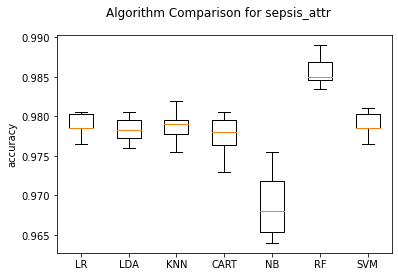

= normalized_attr = 
algorithm,mean,std,signficance,p-val


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.978900 (0.001411) False nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.978350 (0.001582) True 0.017439


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.979200 (0.001778) False 0.415129


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.978000 (0.001871) False 0.276819
NB: 0.968950 (0.004022) True 0.000005


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.985850 (0.001975) True 0.000003


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.978900 (0.001411) False nan
 == 5.4 Select Best Model, Compare Algorithms == 


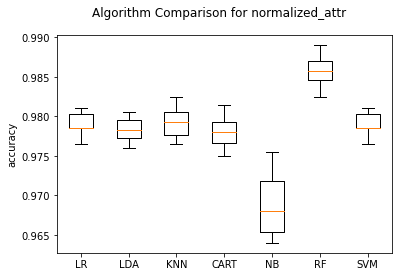

= standardized_attr = 
algorithm,mean,std,signficance,p-val


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.978850 (0.001343) False nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.978350 (0.001582) True 0.014956


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.978750 (0.001820) False 0.814394


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.977300 (0.001552) False 0.051034
NB: 0.968950 (0.004022) True 0.000005


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.985900 (0.001356) True 0.000001


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.978900 (0.001411) False 0.343436
 == 5.4 Select Best Model, Compare Algorithms == 


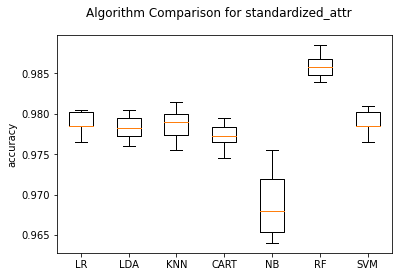

= undersampling_attr = 
algorithm,mean,std,signficance,p-val


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.725434 (0.078054) False nan
LDA: 0.709958 (0.054298) False 0.394270
KNN: 0.572353 (0.033848) True 0.000057
CART: 0.867353 (0.026707) True 0.000357
NB: 0.635126 (0.055035) True 0.005116
RF: 0.889846 (0.033472) True 0.000158


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.553417 (0.040628) True 0.000028
 == 5.4 Select Best Model, Compare Algorithms == 


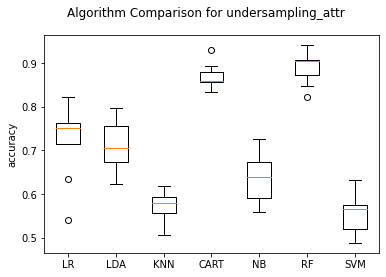

= oversampling_attr = 
algorithm,mean,std,signficance,p-val


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.796788 (0.007226) False nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.766830 (0.004845) True 0.000003


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.917816 (0.003878) True 0.000000


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.982174 (0.002398) True 0.000000
NB: 0.716442 (0.007104) True 0.000000


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.989120 (0.001362) True 0.000000


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.648381 (0.010028) True 0.000000
 == 5.4 Select Best Model, Compare Algorithms == 


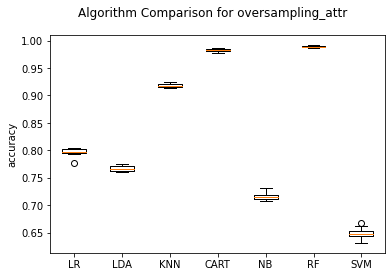

In [67]:
# Spot Check Algorithms
print("== 5.3 Build Models: build and evaluate our five models, Spot Check Algorithms ==")
datasets = []
datasets.append(('sepsis_attr', sepsis_attr, label))
datasets.append(('normalized_attr', normalized_attr, label))
datasets.append(('standardized_attr', standardized_attr, label))
datasets.append(('undersampling_attr', undersampling_attr, undersampling_label))
datasets.append(('oversampling_attr', oversampling_attr, oversampling_label))

models = []
models.append(('LR', LogisticRegression())) # based on imbalanced datasets and default parameters
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

print("eval metric: " + scoring)
for dataname, attributes, target in datasets:
	# evaluate each model in turn
	results = []
	names = []
	print("= " + dataname + " = ")
	print("algorithm,mean,std,signficance,p-val")
	for name, model in models:
		kfold = model_selection.KFold(n_splits=10, random_state=seed)
		cv_results = model_selection.cross_val_score(model, attributes, target, cv=kfold, scoring=scoring)
		results.append(cv_results)
		#print("cv_results")
		#print(cv_results)
		names.append(name)
		
		t, prob = stats.ttest_rel(a= cv_results,b= results[0])
		#print("LR vs ", name, t,prob)
		# Below 0.05, significant. Over 0.05, not significant. 
		# http://blog.minitab.com/blog/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005
		statistically_different = (prob < 0.05)
		
		msg = "%s: %f (%f) %s %f" % (name, cv_results.mean(), cv_results.std(), statistically_different, prob)
		print(msg)

	# Compare Algorithms
	print(" == 5.4 Select Best Model, Compare Algorithms == ")
	fig = plt.figure()
	fig.suptitle('Algorithm Comparison for ' + dataname)
	ax = fig.add_subplot(111) # what does 111 mean?
	plt.boxplot(results)
	plt.ylabel(scoring)
	ax.set_xticklabels(names)
	plt.show()

In [69]:
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(sepsis_attr, label, test_size=test_size,
random_state=7)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2','l1']}
logr = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring='accuracy')
logr.fit(X_train, Y_train)
print("logr.best_score=",logr.best_score_)
print("logr.best_estimator_.C=",logr.best_estimator_.C)
print("logr.best_estimator_.penalty=",logr.best_estimator_.penalty)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

logr.best_score= 0.7813432835820896
logr.best_estimator_.C= 10
logr.best_estimator_.penalty= l2


In [71]:
#building model for baseline
model = LogisticRegression(class_weight='balanced')
y_score = model.fit(sepsis_attr, label)
result = model.score(X_test, Y_test) # determine r2 value
print("baseline accuracy on X_test without grid search=",result)

baseline accuracy on X_test without grid search= 0.7754545454545455


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [72]:
#building model with grid search selected parameters
model = LogisticRegression(class_weight='balanced',C=logr.best_estimator_.C, penalty=logr.best_estimator_.penalty)
y_score = model.fit(sepsis_attr, label)
result = model.score(X_test, Y_test) # determine r2 value
print("accuracy with grid search selected C and penalty_model, and before storing to disk", result)

accuracy with grid search selected C and penalty_model, and before storing to disk 0.7748484848484849


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
# build and save model using Pickle
from random import *
import pickle

In [78]:
# final model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [80]:
delta0_predictions=model.predict(X_test)
print("delta0_predictions")
print("accuracy_score=",accuracy_score(Y_test, delta0_predictions))
tn, fp, fn, tp=confusion_matrix(Y_test, delta0_predictions).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
sensitivity_tpr = float(tp)/(float(tp)+float(fp))
specificity_tnr = float(tn)/(float(tn)+float(fp))
print("sensitivity_tpr,specificity_tnr:", sensitivity_tpr,specificity_tnr)
print(classification_report(Y_test, delta0_predictions))

delta0_probs=model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, delta0_probs[:, 1])
roc_auc = auc(fpr, tpr)
print("delta0_roc_auc:", roc_auc)

delta0_predictions
accuracy_score= 0.7748484848484849
tn, fp, fn, tp: 5007 1450 36 107
sensitivity_tpr,specificity_tnr: 0.06872190109184328 0.7754375096794177
              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      6457
         1.0       0.07      0.75      0.13       143

    accuracy                           0.77      6600
   macro avg       0.53      0.76      0.50      6600
weighted avg       0.97      0.77      0.85      6600

delta0_roc_auc: 0.7828756345095202


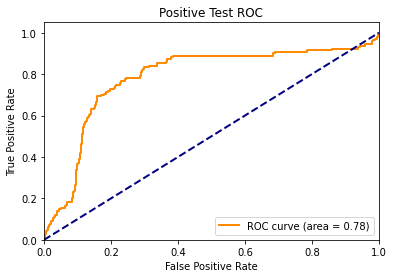

In [81]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Positive Test ROC')
plt.legend(loc="lower right")
plt.show()

In [83]:
print("model.self.classes_",model.classes_)
delta_range=[-.02, 0, 0.02, 0.04, 0.06, 0.08, .10, .12]
i=0
sensitivity_tpr=[0.0] * len(delta_range)
specificity_tnr=[0.0] * len(delta_range)
for delta in delta_range:	
	probs=model.predict_proba(X_test)
	report = [[ins[0], ins[1], 1] if (ins[1] > (ins[0]+delta)) else [ins[0], ins[1], 0] for ins in probs]
	report_df = pd.DataFrame(report, columns=['neg_prob','pos_prob','pred'])
	predictions = np.array(report_df.values)[:,2]
	tn, fp, fn, tp=confusion_matrix(Y_test, predictions).ravel()
	sensitivity_tpr[i]= float(tp)/(float(tp)+float(fn))
	specificity_tnr[i]= float(tn)/(float(tn)+float(fp))
	print("deltaX,sensitivity_tpr,specificity_tnr:", delta, sensitivity_tpr[i],specificity_tnr[i]) 
	#print("accuracy_score=",accuracy_score(Y_test, predictions))
	print("confusion_matrix: tn, fp, fn, tp:", tn, fp, fn, tp)
	#print(classification_report(Y_test, predictions))
	i=i+1

model.self.classes_ [0. 1.]
deltaX,sensitivity_tpr,specificity_tnr: -0.02 0.7832167832167832 0.7458572092302928
confusion_matrix: tn, fp, fn, tp: 4816 1641 31 112
deltaX,sensitivity_tpr,specificity_tnr: 0 0.7482517482517482 0.7754375096794177
confusion_matrix: tn, fp, fn, tp: 5007 1450 36 107
deltaX,sensitivity_tpr,specificity_tnr: 0.02 0.7272727272727273 0.8023850085178875
confusion_matrix: tn, fp, fn, tp: 5181 1276 39 104
deltaX,sensitivity_tpr,specificity_tnr: 0.04 0.6993006993006993 0.8265448350627226
confusion_matrix: tn, fp, fn, tp: 5337 1120 43 100
deltaX,sensitivity_tpr,specificity_tnr: 0.06 0.6503496503496503 0.8449744463373083
confusion_matrix: tn, fp, fn, tp: 5456 1001 50 93
deltaX,sensitivity_tpr,specificity_tnr: 0.08 0.6223776223776224 0.8604615146352795
confusion_matrix: tn, fp, fn, tp: 5556 901 54 89
deltaX,sensitivity_tpr,specificity_tnr: 0.1 0.5804195804195804 0.8719219451757783
confusion_matrix: tn, fp, fn, tp: 5630 827 60 83
deltaX,sensitivity_tpr,specificity_tnr: 0.

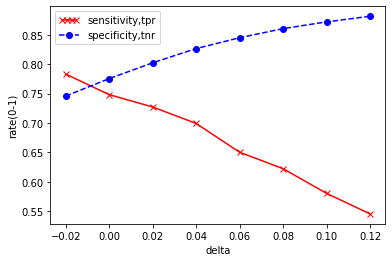

In [84]:
from matplotlib.legend_handler import HandlerLine2D

plt.clf()
pred_legend,=plt.plot(delta_range, sensitivity_tpr, 'r', marker='x', label="sensitivity,tpr") 
prob_legend,=plt.plot(delta_range, specificity_tnr, 'b', linestyle='--', marker='o', label="specificity,tnr")
plt.legend(handler_map={pred_legend: HandlerLine2D(numpoints=4)})
plt.xlabel('delta')
plt.ylabel('rate(0-1)')
plt.show()

In [85]:
delta=-0.10
print("cross-over of sensitivity and specificity lie at about delta=", delta)
report=[[ins[0], ins[1], 1] if (ins[1] > (ins[0]+delta)) else [ins[0], ins[1], 0] for ins in probs]
report_df=pd.DataFrame(report, columns=['neg_prob','pos_prob','pred'])
predictions=np.array(report_df.values)[:,2]
positive_prob=np.array(report_df.values)[:,1]

cross-over of sensitivity and specificity lie at about delta= -0.1


In [86]:
print("accuracy_score=",accuracy_score(Y_test, predictions))
tn, fp, fn, tp=confusion_matrix(Y_test, predictions).ravel()
print("confusion_matrix: tn, fp, fn, tp:", tn, fp, fn, tp)
sensitivity_tpr= float(tp)/(float(tp)+float(fn))
specificity_tnr= float(tn)/(float(tn)+float(fp))
print("deltaX,sensitivity_tpr,specificity_tnr:", delta, sensitivity_tpr,specificity_tnr) 
print(classification_report(Y_test, predictions))

accuracy_score= 0.6039393939393939
confusion_matrix: tn, fp, fn, tp: 3859 2598 16 127
deltaX,sensitivity_tpr,specificity_tnr: -0.1 0.8881118881118881 0.5976459656187084
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75      6457
         1.0       0.05      0.89      0.09       143

    accuracy                           0.60      6600
   macro avg       0.52      0.74      0.42      6600
weighted avg       0.98      0.60      0.73      6600



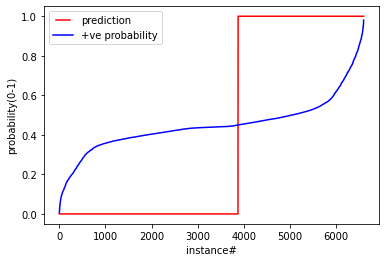

In [88]:
# sort instances by (a) class, and then (b) positive probability for plotting
report_df=report_df.sort_values(by=['pred','pos_prob'])
predictions=np.array(report_df.values)[:,2]
positive_prob=np.array(report_df.values)[:,1]

plt.clf()
pred_legend,=plt.plot(predictions, 'r', label="prediction") 
prob_legend,=plt.plot(positive_prob, 'b', label="+ve probability")

plt.legend(handler_map={pred_legend: HandlerLine2D(numpoints=4)})
plt.xlabel('instance#')
plt.ylabel('probability(0-1)')

plt.show()